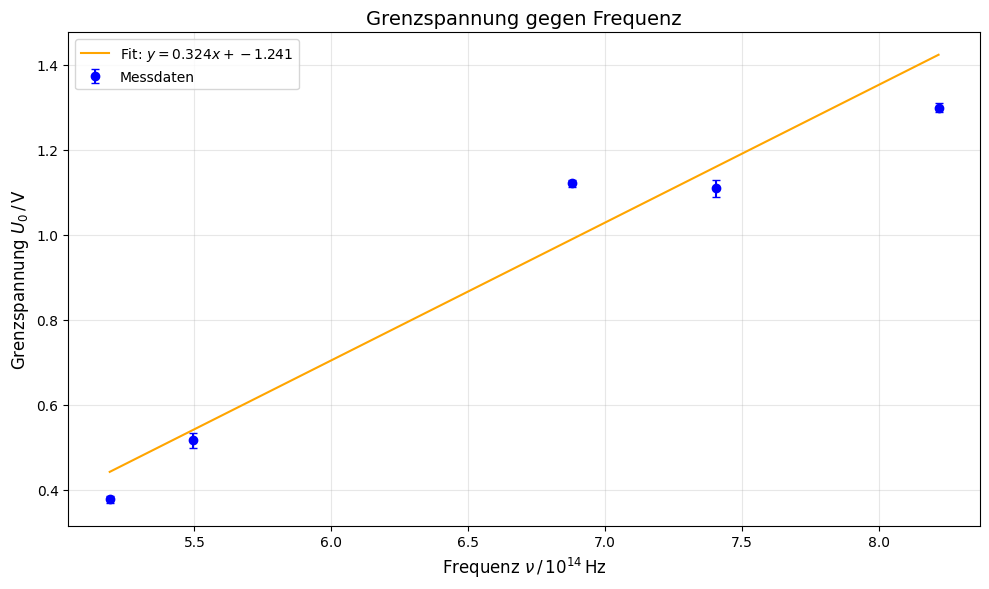

Fit-Ergebnisse:
Steigung (h/e): 3.242e-01 ± 4.344e-03 V·s
Achsenabschnitt (-W_A/e): 1.241e+00 ± 2.900e-02 V

Berechnete Werte:
Plancksche Konstante h: 5.194e-20 ± 6.959e-22 J·s
Austrittsarbeit W_A: 1.988e-19 ± 4.646e-21 J


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Lineares Modell
def linear(x, a, b):
    return a * x + b

# Daten: Wellenlängen (in nm), Grenzspannung (in V), und Fehler auf U_0
wavelengths = np.array([365, 405, 436, 546, 578])  # in nm
U_0 = np.array([1.299, 1.109, 1.121, 0.516, 0.377])  # in V
U_0_errors = np.array([0.011, 0.019, 0.008, 0.018, 0.009])  # in V

# Konstanten
c = 3e8  # Lichtgeschwindigkeit in m/s
e = 1.602e-19  # Elementarladung in C

# Umrechnung der Wellenlängen in Frequenzen
frequencies = c / (wavelengths * 1e-9)  # in Hz
frequencies *= 1e-14  # in 10^14 Hz (für bessere Plot-Skalierung)

# Lineare Regression mit Fehlerberücksichtigung
popt, pcov = curve_fit(linear, frequencies, U_0, sigma=U_0_errors, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))  # Fehler der Fit-Parameter

# Berechnung der Planckschen Konstante und der Austrittsarbeit
h_over_e = popt[0]  # h/e aus der Steigung
h_over_e_error = perr[0]
W_A_over_e = -popt[1]  # -b aus dem Achsenabschnitt
W_A_over_e_error = perr[1]

h = h_over_e * e  # h = (h/e) * e
h_error = h_over_e_error * e
W_A = W_A_over_e * e  # W_A = -(b/e) * e
W_A_error = W_A_over_e_error * e

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(frequencies, U_0, yerr=U_0_errors, fmt='o', label='Messdaten', color='blue', capsize=3)
plt.plot(frequencies, linear(frequencies, *popt), label=f'Fit: $y = {popt[0]:.3f}x + {popt[1]:.3f}$', color='orange')
plt.xlabel(r'Frequenz $\nu \, / \, 10^{14} \, \mathrm{Hz}$', fontsize=12)
plt.ylabel(r'Grenzspannung $U_0 \, / \, \mathrm{V}$', fontsize=12)
plt.title('Grenzspannung gegen Frequenz', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Speichern des Plots
plt.savefig("frequency_vs_stopping_potential.png", dpi=300)
plt.show()

# Ergebnisse ausgeben
print("Fit-Ergebnisse:")
print(f"Steigung (h/e): {h_over_e:.3e} ± {h_over_e_error:.3e} V·s")
print(f"Achsenabschnitt (-W_A/e): {W_A_over_e:.3e} ± {W_A_over_e_error:.3e} V")
print()
print("Berechnete Werte:")
print(f"Plancksche Konstante h: {h:.3e} ± {h_error:.3e} J·s")
print(f"Austrittsarbeit W_A: {W_A:.3e} ± {W_A_error:.3e} J")
